# Practical 1: Fundamentals of Remote Sensing and Digital Image Processing

In this practical, we'll exercise the fundamentals of remote sensing (radiation, transmission, etc). We'll also learn how to do some image processing using Python's [scikit-image](https://scikit-image.org) library.

## Loading an image with scikit-image

Images are represented computationally as **2D arrays of integers**.

---

In [6]:
import skimage.io

In [54]:
image = skimage.io.imread("sample-image.tif")

In [55]:
image

array([[6681, 6678, 6682, ..., 7051, 7008, 6985],
       [6699, 6662, 6707, ..., 7029, 7099, 6992],
       [6670, 6677, 6704, ..., 7004, 7038, 6956],
       ...,
       [7578, 7660, 7594, ..., 7919, 7949, 7945],
       [7535, 7606, 7463, ..., 7918, 7922, 7928],
       [7517, 7552, 7216, ..., 7914, 7920, 7938]], dtype=uint16)

### Questions:

1. What is the size of the array (number of rows and columns)?
1. What is the data type of the elements in this array?
1. How many bits are required to store each element?
1. How many possible values can be stored?

## Plotting images with matplotlib

We can map each possible value in the array to a color using a **colormap**. There are [many types of colormaps](https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py). The resulting image is a **pseudo-color plot**.

---

In [57]:
import matplotlib.pyplot as plt

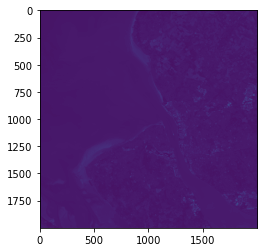

In [61]:
plt.imshow(image)

### Task: Select a 500 x 500 pixel region of this image and plot it.

You can choose the region and the colormap. Paste the image you produce into the shared Google Docs.



## Image enhancements

Contrast enhancement techniques for grayscale (single band) images:

1. Contrast stretching: increases the contrast of the image by mapping the intensity values of the input image to a new range of values (usually shorter than the original). Function: [skimage.exposure.rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity)
2. Histogram equalization: enhances the contrast of images by transforming the intensity values of an image so that the histogram of the output image approximately matches a specified distribution (for example, a uniform distribution). Function: [skimage.exposure.equalize_hist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist)
3. Adaptive histogram equalization: operates on small data regions (tiles) rather than the entire image. Each tile's contrast is enhanced so that the histogram of each output region approximately matches the specified distribution. Function: [skimage.exposure.equalize_adapthist](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_adapthist)

These enhancements are used to aid the *visualization* of images. **Be careful to always preserve the original and communicate that you have processed the images.** 

**The enhanced versions are usually not suitable for quantitative analysis (why is that?).**


### Contrast stretching 

Stretches the values of the image to a new interval defined by us. Can be used to limit the effect of very bright or very dim pixels.

In [64]:
import numpy as np

In [65]:
# The first one is a bit trickier. 
# If we want to stretch the contrast so that 2% of the data are saturated in the low and high ends,
# we need to first compute the values in the 2nd and 98th percentile of the image first.
low_end, high_end = np.percentile(image, (2, 98))
image_rescale = skimage.exposure.rescale_intensity(image , in_range=(low_end, high_end))

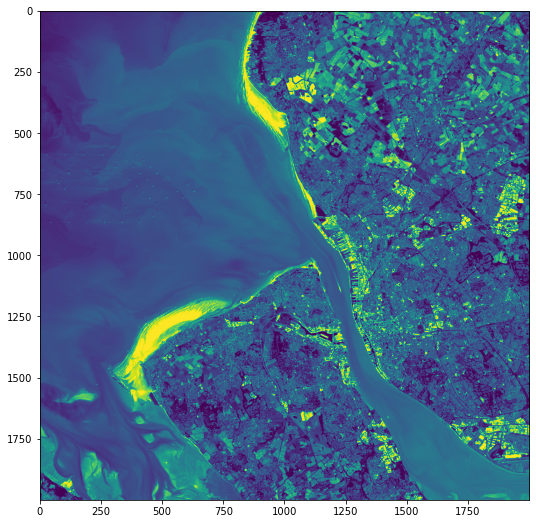

In [66]:
# Plot the images and their respective histograms
plt.figure(figsize=(18, 9))
plt.imshow(image_rescale)

### Task: Apply histogram equalization (normal and adaptive) to the image.

Make figures to compare the results. Paste the image you produce into the shared Google Docs. 